In [78]:
#Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
#import train test split
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [17]:
#loading the dataset
ds = pd.read_csv("DSData-master/Advertising.csv")



In [18]:
#displaying data first 5 rows
ds.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
cols = ds.columns
cols[1:]

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [19]:
#removing extra index column
ds = ds[cols[1:]]

In [21]:
ds.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
#checking last 5 rows
ds.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [24]:
#cheking data set shape
ds.shape
#there are 200 rows and four column

(200, 4)

#column descriptions

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper

#target variable/dependent variable
Sales: sales of a single product in a given market (in thousands of items)

Because the response variable is continuous, this is a regression problem.
There are 200 observations (represented by the rows), and each observation represent data about a single market

In [26]:
#checking 
ds.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

#ds does not contain any null values

In [27]:
ds.describe(include='all')

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
#through the above we could say that there are less chance of being outlier in the dataset
#we could also say that TV has highesht money following newspaper and radio has least amount invested for any market

In [33]:
ds[ds.radio == 0]
#theres only one market where there is no investment in radio

,TV,radio,newspaper,sales
127,80.2,0.0,9.2,8.8


In [34]:
sales_ds = ds.select_dtypes(include=np.number)

In [43]:
sales_ds_corr = sales_ds.corr()
sales_ds_corr
#we see that sales - our target variables is higly corelated with TV than radio 
#we also see that features variables are not corelated with each other

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


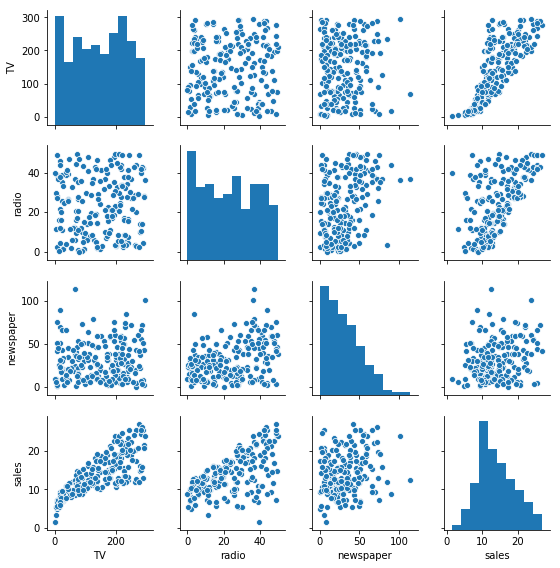

In [41]:
#we could see the correlation visually using seaborn pairplot method - plotting correlation 
sns.pairplot(ds,size=2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


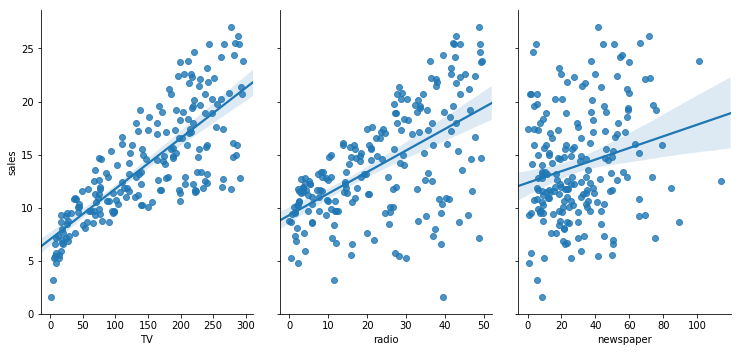

In [48]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(ds, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, aspect=0.7, kind='reg')

Linear regression Pros and Cons¶

Pros:

Fast
No tuning required
Highly interpretable
Well-understood

Cons:

#Unlikely to produce the best predictive accuracy
#Presumes a linear relationship between the features and response
#If the relationship is highly non-linear as with many scenarios, linear relationship will not effectively model the relationship and its prediction would not be accurate

#Linear Regression Equation

y=β0+β1x1+β2x2+...+βnxn 

y is the response

β0 is the intercept

β1 is the coefficient for x1 (the first feature)

βn is the coefficient for xn (the nth feature)

In [49]:
#preparing dataset for sci-kit
X = ds[['TV','radio','newspaper']]
Y = ds['sales']

In [50]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [51]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [52]:
#splitting the dataset into traing and testing dataset with ration of 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 40)

In [54]:
linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
#our features coefficients
linreg.coef_
#they tell us if we increase one unit of value of out feature variable this much amount will increse in the target variable

array([ 0.04374167,  0.19818858, -0.00520108])

In [64]:
cols[1:-1]

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [72]:
dscols = zip(cols[1:-1],linreg.coef_)
print(list(dscols))


[('TV', 0.04374166928437962), ('radio', 0.19818857984289623), ('newspaper', -0.0052010793829438086)]


#For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0437 "unit" increase in Sales.
#For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 43.7 items.

In [76]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1/n∑|yi−y^i|
 
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

Mean Squared Error (MSE) is the mean of the squared errors:
1/n∑(yi−y^i)^2
 
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
sqrt(1/n∑(yi−y^i)2)
 
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.



In [79]:
#Computing the RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.0677361679196085


In [82]:
#score on the testing dataset
linreg.score(X_test,y_test)


0.8428365067609932

In [80]:
#this should be minimum

In [98]:
#removing newspaper feature becoause it is very less corelated with sales
X= ds[['TV','radio']]
#chosing different random state will give us differnet accuracy for the train and test dataset
#becuase accuracy will depend which observations are in the training set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 22)

In [99]:

linreg = LinearRegression()

linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [101]:
#Computing the RMSE for our Sales predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.592194993100469


In [102]:
#score on the testing dataset
linreg.score(X_test,y_test)


0.9049441685388324

In [103]:
#checking other model for regression 
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor(n_estimators=350,random_state=43)
random_model.fit(X_test, y_test)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=None,
           oob_score=False, random_state=43, verbose=0, warm_start=False)

In [104]:
y_train.shape

(140,)

In [105]:

random_model.score(X_test,y_test)
#giving us very high accuracy

0.9950936967831914

In [65]:
#we can stop at random forest because it gives us very good accuracy

Saving the Random Forest MODEL  

In [107]:
import pickle
file=open("sales.obj","wb")
pickle.dump(random_model,file)
file.close()

In [108]:
file=open("sales.obj",'rb')
object_file=pickle.load(file)
file.close()

In [109]:
result=object_file.score(X_test,y_test)
result

0.9950936967831914